In [ ]:
import pandas as pd
import numpy as np

# --- Step 1: Load the CSVs using the correct header row ---
baseline_df = pd.read_csv("/content/Baseline_us-west-1_20250531_004119.csv", skiprows=1)
cloudflare_df = pd.read_csv("/content/Cloudflare_One_us-west-1_20250603_200259.csv", skiprows=1)

# --- Step 2: Tag each with Source label ---
baseline_df['Source'] = 'Baseline'
cloudflare_df['Source'] = 'Cloudflare WARP'

# --- Step 3: Combine both into a single DataFrame ---
df = pd.concat([baseline_df, cloudflare_df], ignore_index=True)

# --- Step 4: Rename metric columns for clarity ---
df = df.rename(columns={
    "METRICS": "metric_1",
    "Unnamed: 4": "metric_2",
    "Unnamed: 5": "metric_3",
    "Unnamed: 6": "metric_4",
    "Unnamed: 7": "metric_5",
    "Unnamed: 8": "metric_6"
})

# --- Step 5: Clean up metric values ---
def clean_metric(val):
    if isinstance(val, str):
        val = val.replace("ms", "").replace("s", "").strip()
        if val == "NA" or val == "":
            return np.nan
        try:
            return float(val)
        except:
            return np.nan
    return val

metric_cols = ['metric_1', 'metric_2', 'metric_3', 'metric_4', 'metric_5', 'metric_6']
for col in metric_cols:
    df[col] = df[col].apply(clean_metric)

# --- (Optional Preview) ---
print(df.head())


   TEST         DESTINATION           LOCATION  metric_1  metric_2  metric_3  \
0  PING  angolacables.co.ao         Luanda, AO   194.851   194.975   195.176   
1  PING        jumia.com.ng  San Francisco, US     1.804     1.815     1.822   
2  PING   0.ie.pool.ntp.org  San Francisco, US       NaN       NaN       NaN   
3  PING     safaricom.co.ke      San Mateo, US    33.015    33.053    33.087   
4  PING          aliyun.com       Shanghai, CN   170.192   170.213   170.246   

   metric_4  metric_5  metric_6    Source  
0     0.125       0.0       NaN  Baseline  
1     0.007       0.0       NaN  Baseline  
2       NaN     100.0       NaN  Baseline  
3     0.030       0.0       NaN  Baseline  
4     0.021       0.0       NaN  Baseline  


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cloudflare_One_us-west-1_20250603_200259.csv to Cloudflare_One_us-west-1_20250603_200259.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Baseline_us-west-1_20250531_004119.csv to Baseline_us-west-1_20250531_004119.csv


In [ ]:
import pandas as pd
import numpy as np

# Load CSVs (update filenames if needed)
baseline_df = pd.read_csv("/content/Baseline_us-west-1_20250531_004119.csv", skiprows=1)
cloudflare_df = pd.read_csv("/content/Cloudflare_One_us-west-1_20250603_200259.csv", skiprows=1)

# Add source column
baseline_df['Source'] = 'Baseline'
cloudflare_df['Source'] = 'Cloudflare WARP'

# Combine
df = pd.concat([baseline_df, cloudflare_df], ignore_index=True)

# Rename metric columns
df = df.rename(columns={
    "METRICS": "metric_1",
    "Unnamed: 4": "metric_2",
    "Unnamed: 5": "metric_3",
    "Unnamed: 6": "metric_4",
    "Unnamed: 7": "metric_5",
    "Unnamed: 8": "metric_6"
})


In [ ]:
# Metric cleaning function
def clean_metric(val):
    if isinstance(val, str):
        val = val.replace("ms", "").replace("s", "").strip()
        if val == "NA" or val == "":
            return np.nan
        try:
            return float(val)
        except:
            return np.nan
    return val

# Apply to all metric columns
metric_cols = ['metric_1', 'metric_2', 'metric_3', 'metric_4', 'metric_5', 'metric_6']
for col in metric_cols:
    df[col] = df[col].apply(clean_metric)

# Add computed features
df["metric_mean"] = df[metric_cols].mean(axis=1).round(3)
df["metric_std"] = df[metric_cols].std(axis=1).round(3)
df["test_failed"] = df[metric_cols].isnull().all(axis=1)


In [ ]:
# Preview
df.head()


,TEST,DESTINATION,LOCATION,metric_1,metric_2,metric_3,metric_4,metric_5,metric_6,Source,metric_mean,metric_std,test_failed
0,PING,angolacables.co.ao,"Luanda, AO",194.851,194.975,195.176,0.125,0.0,NaN,Baseline,117.025,106.772,False
1,PING,jumia.com.ng,"San Francisco, US",1.804,1.815,1.822,0.007,0.0,NaN,Baseline,1.090,0.991,False
2,PING,0.ie.pool.ntp.org,"San Francisco, US",NaN,NaN,NaN,NaN,100.0,NaN,Baseline,100.000,NaN,False
3,PING,safaricom.co.ke,"San Mateo, US",33.015,33.053,33.087,0.030,0.0,NaN,Baseline,19.837,18.095,False
4,PING,aliyun.com,"Shanghai, CN",170.192,170.213,170.246,0.021,0.0,NaN,Baseline,102.134,93.226,False


In [ ]:
# Save to download
df.to_csv("cleaned_defensive_data.csv", index=False)
files.download("cleaned_defensive_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

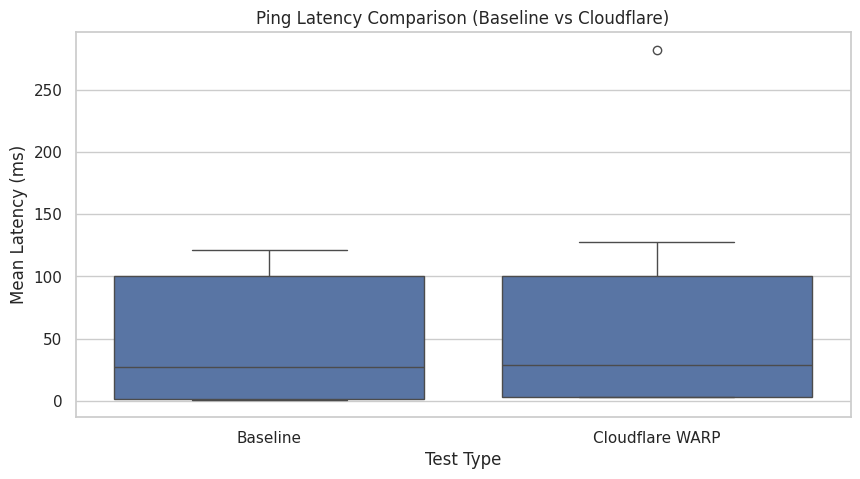

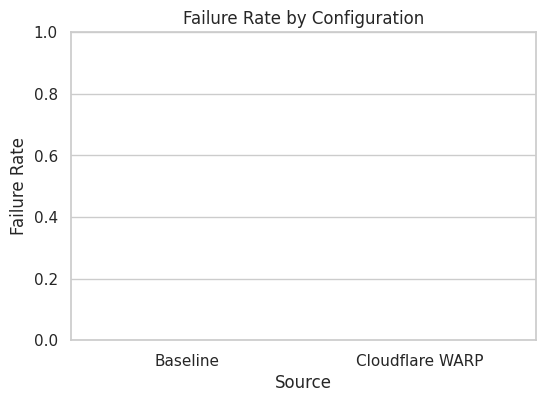

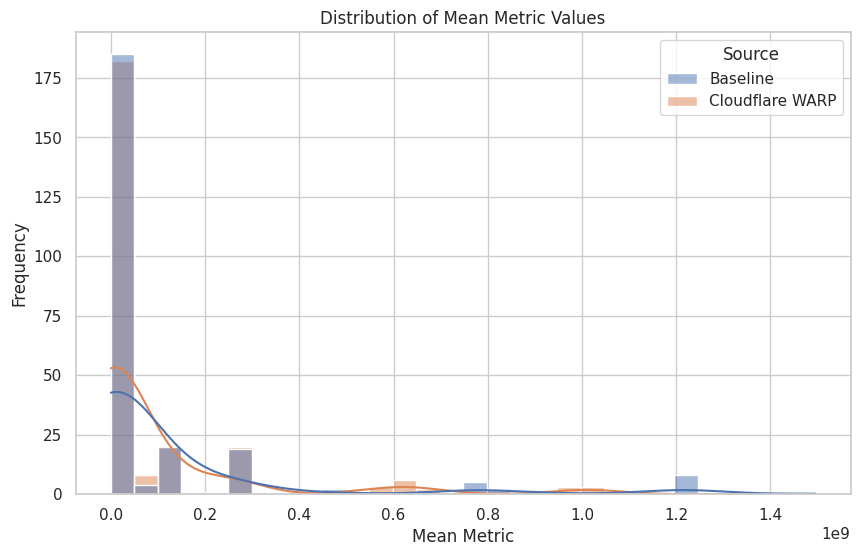

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# 🔸 Latency Comparison for Ping Tests
ping_df = df[df["TEST"] == "PING"]

plt.figure(figsize=(10, 5))
sns.boxplot(data=ping_df, x="Source", y="metric_mean")
plt.title("Ping Latency Comparison (Baseline vs Cloudflare)")
plt.ylabel("Mean Latency (ms)")
plt.xlabel("Test Type")
plt.show()

# 🔸 Test Failure Rate by Source
fail_rate = df.groupby("Source")["test_failed"].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=fail_rate, x="Source", y="test_failed")
plt.title("Failure Rate by Configuration")
plt.ylabel("Failure Rate")
plt.ylim(0, 1)
plt.show()

# 🔸 Metric Distribution Across All Tests
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="metric_mean", hue="Source", bins=30, kde=True)
plt.title("Distribution of Mean Metric Values")
plt.xlabel("Mean Metric")
plt.ylabel("Frequency")
plt.show()
